In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from text_preprocessor import process_df



cleaned_df = process_df("ice_cream_reviews.csv", to_drop=["author", "date", "helpful_yes", "helpful_no"])

X_train = cleaned_df[1600:]
X_test = cleaned_df[:1600]

In [6]:
# instantiate the Term Frequency Inverse Document Frequency vectorizer (TFIDF)
tfidf = TfidfVectorizer()


# fitting the tfidf vectorizer and also tranforming it
train_tfidf = tfidf.fit_transform(X_train["review"])

# transform means to turn your documents into a document-term matrix, which is a type of sparse matrix
test_tfidf = tfidf.transform(X_test["review"])
train_tfidf

<3732x6698 sparse matrix of type '<class 'numpy.float64'>'
	with 74416 stored elements in Compressed Sparse Row format>

In [12]:
model = SVC(kernel="linear")
model.fit(train_tfidf, X_train["sentiment"])
prediction = model.predict(test_tfidf)

# calculates precision, recall, f1 for each class.
report = classification_report(X_test["sentiment"], prediction, output_dict=True)
print(report["1"])
print(report["0"])

{'precision': 0.8952380952380953, 'recall': 0.9652448657187994, 'f1-score': 0.9289243633599392, 'support': 1266}
{'precision': 0.8127659574468085, 'recall': 0.5718562874251497, 'f1-score': 0.671353251318102, 'support': 334}


The cell below contains a modified excerpt from the Python Data Science Handbook by Jake VanderPlas taken from the class notebook C06_SupportVectorMachines.ipynb

The text is released under the CC-BY-NC-ND license, and code is released under the MIT license. 

[0.         0.03448276 0.06896552 0.10344828 0.13793103 0.17241379
 0.20689655 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034
 0.4137931  0.44827586 0.48275862 0.51724138 0.55172414 0.5862069
 0.62068966 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345
 0.82758621 0.86206897 0.89655172 0.93103448 0.96551724 1.        ]
[0.         0.03448276 0.06896552 0.10344828 0.13793103 0.17241379
 0.20689655 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034
 0.4137931  0.44827586 0.48275862 0.51724138 0.55172414 0.5862069
 0.62068966 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345
 0.82758621 0.86206897 0.89655172 0.93103448 0.96551724 1.        ]


ValueError: X has 2 features, but SVC is expecting 6698 features as input.

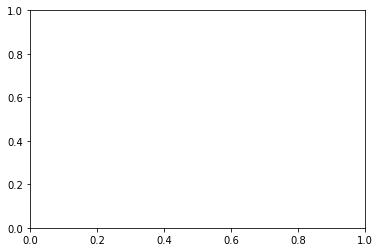

In [9]:



def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    
    # create grid to evaluate model. COnstructs a uniform mesh of values
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    
    P = model.decision_function(xy).reshape(X.shape)
    
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='b',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    print(plot_support)
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    


plot_svc_decision_function(model, plot_support=True) 

